In [1]:
## https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
## https://gist.github.com/fchollet
meanloss = []
valloss = []

accuA = []
valaccuA = []

In [2]:
# baseline model for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
 
for i in range(5):
    # define cnn model
    def define_model():
        model = Sequential()
        model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
        model.add(MaxPooling2D((2, 2)))
        model.add(Flatten())
        model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
        model.add(Dense(1, activation='sigmoid'))
        # compile model
        opt = SGD(learning_rate=0.001, momentum=0.9)
        model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
        return model

    # plot diagnostic learning curves
    def summarize_diagnostics(history):
        f = pyplot.figure(figsize=(10,10))
        # plot loss
        ax = f.add_subplot(211)
        ax.title.set_text('Cross Entropy Loss')
        ax.plot(history.history['loss'], color='blue', label='train')
        ax.plot(history.history['val_loss'], color='orange', label='test')
        ax.legend()
        # plot accuracy
        ax2 = f.add_subplot(212)
        ax2.title.set_text('Classification Accuracy')
        ax2.plot(history.history['accuracy'], color='blue', label='train')
        ax2.plot(history.history['val_accuracy'], color='orange', label='test')
        ax2.legend()
        # save plot to file
#         filename = sys.argv[0].split('/')[-1]
        pyplot.savefig('loos128_128_plot.png')
        pyplot.close()

    # run the test harness for evaluating a model
    def run_test_harness():
        # define model
        model = define_model()
        # create data generator
        datagen = ImageDataGenerator(rescale=1.0/255.0)
        # prepare iterators
        train_it = datagen.flow_from_directory('split/train/',
            class_mode='binary', batch_size=64, target_size=(200, 200))
        test_it = datagen.flow_from_directory('split/test/',
            class_mode='binary', batch_size=64, target_size=(200, 200))
        # fit model
        history = model.fit(train_it, steps_per_epoch=len(train_it),
            validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=0)
        # evaluate model
        _, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
        print(i)
        print('> %.3f' % (acc * 100.0))
        print(f'loss mean = {history.history["loss"]}')
        print("*************************************")        
        print(f'loss valmean = {history.history["val_loss"]}')
        
        valloss.append(history.history["val_loss"])
        meanloss.append(history.history["loss"])
        
        accuA.append(history.history["accuracy"])
        valaccuA.append(history.history["val_accuracy"])
        # learning curves
        summarize_diagnostics(history)

    # entry point, run the test harness
    run_test_harness()
    print("-------------------------------\n")

Found 280 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
0
> 71.667
loss mean = [2.2638461589813232, 0.6638387441635132, 0.6263315081596375, 0.5997238755226135, 0.5736448168754578, 0.5440676808357239, 0.4817429184913635, 0.4548756778240204, 0.4945862889289856, 0.4284086525440216, 0.4072668254375458, 0.3799993097782135, 0.40892305970191956, 0.5899133086204529, 0.5321559309959412, 0.48184934258461, 0.39800798892974854, 0.35627925395965576, 0.2980254590511322, 0.27128615975379944]
*************************************
loss valmean = [0.6750554442405701, 0.6430795192718506, 0.6127086281776428, 0.603716254234314, 0.5889862775802612, 0.5528398156166077, 0.5331108570098877, 0.5313230752944946, 0.5221816301345825, 0.47706565260887146, 0.7175580263137817, 0.8279047608375549, 0.8732625246047974, 0.5052640438079834, 0.7715674042701721, 0.6126102209091187, 0.4979080855846405, 0.4877732992172241, 0.48240789771080017, 0.5563781261444092]
-------------------------------

Found

In [3]:
import numpy as np
mloss = [float(sum(l))/len(l) for l in zip(*meanloss)]
print(meanloss)

mvloss = [float(sum(l))/len(l) for l in zip(*valloss)]
print(valloss)

[[2.2638461589813232, 0.6638387441635132, 0.6263315081596375, 0.5997238755226135, 0.5736448168754578, 0.5440676808357239, 0.4817429184913635, 0.4548756778240204, 0.4945862889289856, 0.4284086525440216, 0.4072668254375458, 0.3799993097782135, 0.40892305970191956, 0.5899133086204529, 0.5321559309959412, 0.48184934258461, 0.39800798892974854, 0.35627925395965576, 0.2980254590511322, 0.27128615975379944], [2.7911980152130127, 0.7050037384033203, 0.6850919127464294, 0.6648740172386169, 0.6397162675857544, 0.6121198534965515, 0.6356203556060791, 0.5534384846687317, 0.5166730880737305, 0.471273809671402, 0.46512657403945923, 0.6604540944099426, 0.7073147892951965, 0.5646160840988159, 0.5689799785614014, 0.46408239006996155, 0.4602414667606354, 0.4411737024784088, 0.41232582926750183, 0.3595544993877411], [3.0131237506866455, 0.6933042407035828, 0.6552121639251709, 0.6567931771278381, 0.6098756790161133, 0.532788097858429, 0.5317800641059875, 0.5335297584533691, 0.6510442495346069, 0.496632277

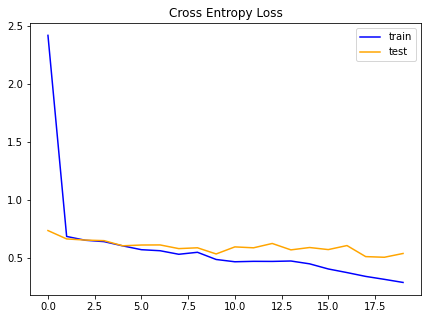

In [4]:
pyplot.figure(figsize=(7,5))
pyplot.title('Cross Entropy Loss')
pyplot.plot(mloss, color='blue', label='train')
pyplot.plot(mvloss, color='orange', label='test')
pyplot.legend()